# THỐNG KÊ MÁY TÍNH & ỨNG DỤNG 
 
Tập dữ liệu sử dụng trong bài kiểm tra này được cung cấp trong file **IT-salaries-in-EU-2018.csv** – Đây là kết quả khảo sát online từ thị trường nhân lực trong lĩnh vực CNTT tại Châu Âu vào năm 2018. Anh/chị được yêu cầu thực hiện các công việc dưới đây

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Đọc dữ liệu và hiển thị 5 dòng dữ liệu đầu tiên. 

In [2]:
df = pd.read_csv('data/IT-salaries-in-EU-2018.csv')

df.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer


### 2. Tìm hiểu thông tin về dữ liệu: 

#### a. Dữ liệu  bao  gồm những thuộc tính  nào? Liệt kê theo nhóm các thuộc tính định tính, các thuộc tính định lượng và chọn tham số thống kê mô tả phù hợp để đo độ tập trung dữ liệu của mỗi nhóm. 

In [3]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Years of experience',
       'Your level', 'Current Salary', 'Salary one year ago',
       'Salary two years ago', 'Are you getting any Stock Options?',
       'Main language at work', 'Company size', 'Company type'],
      dtype='object')

- Dự liệu có thuộc tính định tính và định lượng

|            | Cột                                                                                                                |
| ---------- | ------------------------------------------------------------------------------------------------------------------ |
| Định tính  | Gender, City, Position, Your level, Are you getting any Stock Options?, Main language at work, Company type        |
| Định lượng | Years of experience, Current Salary, Salary one year ago, Salary two years ago, Salary two years ago, Company size |

- Các tham số thống kê mô tả phù hợp để đi độ tập trung dữ liệu của mỗi nhóm là:

|            | Tham số độ tập trung                                                                                                                |
| ---------- | ------------------------------------------------------------------------------------------------------------------ |
| Định tính  | mode, fequency |
| Định lượng | mean, median, mode |

#### b. Có bao nhiêu loại công ty (company type) trong khảo sát? Liệt kê các loại công ty đó

In [6]:
companies = df['Company type'].value_counts()
print(f"Số loại công ty là: {len(companies)}")
print(companies)

Số loại công ty là: 49
Company type
Product                                      451
Startup                                      145
Agency                                        74
Outsource                                      5
Consulting                                     5
Outsourcing                                    3
Corporation                                    2
Insurance                                      2
Consultancy                                    2
Automotive                                     2
Industry                                       1
Big Tech                                       1
Internal development for a non-IT company      1
Personaldienstleister                          1
ipo                                            1
E-Commerce firm                                1
Ecom retailer                                  1
Product and Projects                           1
e-commerce                                     1
Consulting Company               

### 3. Cho biết tỷ lệ nam và nữ xuất hiện trong khảo sát? Chọn loại đồ thị phù hợp trực quan để làm nổi bật so sánh của 2 tỷ lệ này.

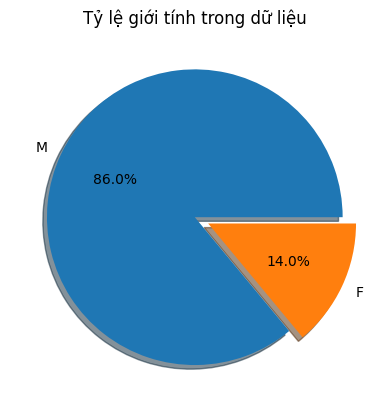

In [ ]:
gender = df['Gender'].value_counts()
plt.pie(x=gender.values, labels=gender.index, autopct='%1.1f%%', shadow=True, explode=(0, 0.1))
plt.title('Tỷ lệ giới tính trong dữ liệu')
plt.show()

- Tỷ lệ giới tính trong khảo sát có sự chênh lệch lớn **Nam(86%)**, **Nữ(14%)**

### 4. Để so sánh mức lương của nam và nữ trong ngành IT:

#### a. Tính đại lượng đặc trưng cho độ tập trung và độ phân tán về mức lương của nam và nữ. Bình luận kết quả tính được. 

In [34]:
df.groupby('Gender')['Current Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,104.0,57272.903846,17474.380683,10300.0,47287.5,55400.0,65000.0,120000.0
M,643.0,70144.544323,21236.965222,13000.0,60000.0,68000.0,77000.0,200000.0


- Lương trung bình của **nam** cao hơn so với **nữ**, tuy nhiên độ lệch chuẩn mức lương của **nữ** lại thấp hơn của **nam**, mức lương thấp nhất, cao nhất của **nam** cao hơn của **nữ**.

#### b. Hãy chọn đồ thị phù hợp để trực quan làm nổi bật sự so sánh mức lương nam và nữ. Đưa ra bình luận của anh/chị. Kết quả  này có tương đồng với bình luận của anh/chị ở trên không?

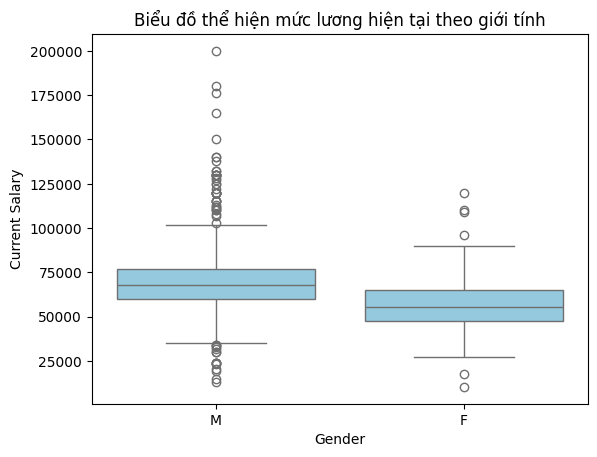

In [40]:
sns.boxplot(data=df, x='Gender', y='Current Salary', color='skyblue')
plt.title('Biểu đồ thể hiện mức lương hiện tại theo giới tính')
plt.show()

- Biểu đồ **boxplot** hiển thị kết quả hoàn toàn giống với bình luận của câu hỏi bên trên

### 5. Những yếu tố (thuộc tính) nào ảnh hưởng đến mức lương của nhân lực IT? Dùng bằng chứng thống kê để giải thích cho nhận định đó của anh/chị. 
 

In [49]:
# Kiểm tra mối quan hệ giữa giới tính và mức lương nhân lực IT
from scipy.stats import ttest_ind
male_salaries = df[df["Gender"] == "M"]["Current Salary"].dropna(inplace=False)
female_salaries = df[df["Gender"] == "F"]["Current Salary"].dropna(inplace=False)

t_stat, p_value = ttest_ind(male_salaries, female_salaries, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Có sự khác biệt đáng kể về mức lương giữa Nam và Nữ.")
else:
    print("Không có sự khác biệt đáng kể về mức lương giữa Nam và Nữ.")

T-statistic: 6.7488822723016595, P-value: 2.732060265240804e-10
Có sự khác biệt đáng kể về mức lương giữa Nam và Nữ.


Hệ số tương quan: 0.37283391971700847, P-value: 1.2254251501252224e-26
Có sự khác biệt đáng kể về mức lương và số năm kinh nghiệm.


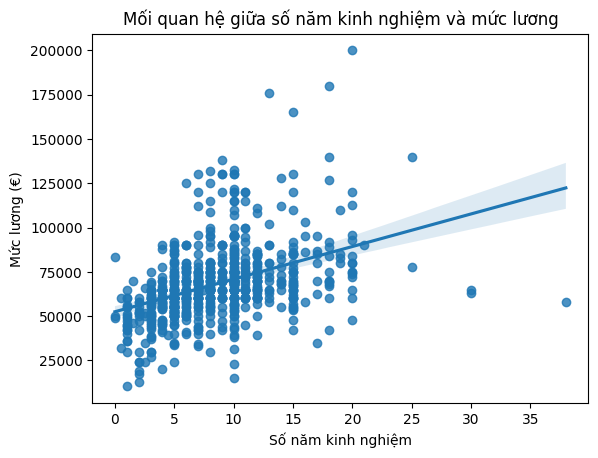

In [54]:
# Kiểm tra mối quan hệ giữa số năm kinh nghiệm và mức lương nhân lực IT
from scipy.stats import pearsonr


years_of_experience = df["Years of experience"].fillna(df['Years of experience'].mean(), inplace=False)
current_salary = df["Current Salary"].fillna(
    df["Years of experience"].mean(), inplace=False
)

corr, p_value = pearsonr(years_of_experience, current_salary)
print(f"Hệ số tương quan: {corr}, P-value: {p_value}")

if p_value < 0.05:
    print("Có sự khác biệt đáng kể về mức lương và số năm kinh nghiệm.")
else:
    print("Không có sự khác biệt đáng kể về mức lương và số năm kinh nghiệm.")

sns.regplot(x=df["Years of experience"], y=df["Current Salary"])
plt.title("Mối quan hệ giữa số năm kinh nghiệm và mức lương")
plt.xlabel("Số năm kinh nghiệm")
plt.ylabel("Mức lương (€)")
plt.show()

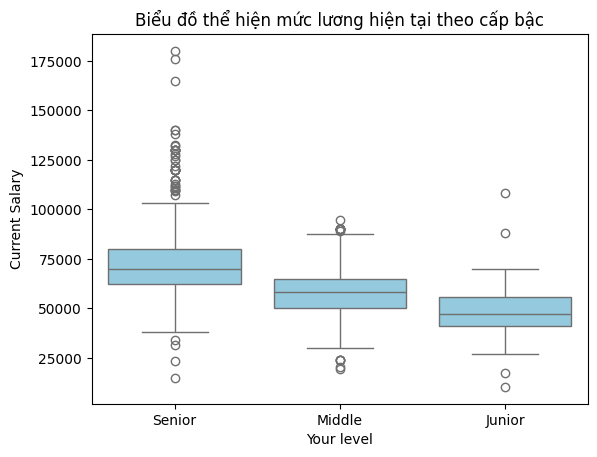

In [68]:
# So sánh mức lương giữa các cấp bậc
df.groupby('Your level')['Current Salary'].describe()

sns.boxplot(data=df, x='Your level', y='Current Salary', color='skyblue')
plt.title('Biểu đồ thể hiện mức lương hiện tại theo cấp bậc')
plt.show()

- Vậy các yếu tố ảnh hưởng đến mức lương nhân lực IT là: **Giới tính**, **Số năm kinh nghiệm**, và **Cấp bậc**.